In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time

import datetime
plt.rcParams["figure.figsize"] = [16,9]
plt.rcParams['axes.facecolor'] = 'dimgrey'
#plt.rcParams['axes.facecolor'] = 'black'

In [2]:
team_1 = "manchester-united"
team_2 = "liverpool-fc"
team_3 = "arsenal-fc"
team_4 = "chelsea-fc"
team_5 = "manchester-city"
team_6 = "tottenham-hotspur"

In [3]:
def DataFilter(df1):
    df = df1.copy(deep=True)
    df['Vic'] = np.NAN
    df['GF'] = np.NAN
    df['GA'] = np.NAN
    df['GD'] = np.NAN
    df['ExpGf'] = np.NAN
    df['ExpGa'] = np.NAN
    df['ExpGd'] = np.NAN
    df['ExpPPM'] = np.NAN
    df['ExpRate'] = np.NAN
    for i in xrange(len(df)):
        tmp = df.score[i]
        #print i,
        #chapter_2.GF[i] = int(tmp[0])
        df.loc[i, 'GF'] = int(tmp[0])
        df.loc[i, 'GA'] = int(tmp[2])
        df.loc[i, 'GD'] = int(tmp[0]) - int(tmp[2])
        df.loc[i, 'Vic'] = float((tmp[0] > tmp[2]))
    df['ExpGf'] = df.GF.cumsum()
    df['ExpGa'] = df.GA.cumsum()
    df['ExpGd'] = df.GD.cumsum()
    df['ExpPPM'] = df.points.cumsum()
    df['ExpRate'] = df.Vic.cumsum()
    for i in xrange(len(df)):
        df.loc[i, 'ExpGf'] = df['ExpGf'][i] / (i+1)
        df.loc[i, 'ExpGa'] = df['ExpGa'][i] / (i+1)
        df.loc[i, 'ExpGd'] = df['ExpGd'][i] / (i+1)
        df.loc[i, 'ExpPPM'] = df['ExpPPM'][i] / (i+1)
        df.loc[i, 'ExpRate'] = df['ExpRate'][i] / (i+1)

    return df

In [4]:
start_1 = pd.to_datetime('5/1/1996')
start_2 = pd.to_datetime('6/1/2003')
start_3 = pd.to_datetime('7/1/2004')
start_4 = pd.to_datetime('9/1/2008')
end_1 = pd.to_datetime('5/1/2009')
end_2 = pd.to_datetime('12/17/2015')

In [5]:
df1 = pd.read_csv('./data/chelsea-fc/chelsea-fc_1992_1993.csv', index_col=0, dtype={'points': float})
df2 = pd.read_csv('./data/chelsea-fc/chelsea-fc_1993_1994.csv', index_col=0, dtype={'points': float})
df3 = pd.read_csv('./data/chelsea-fc/chelsea-fc_1994_1995.csv', index_col=0, dtype={'points': float})
df4 = pd.read_csv('./data/chelsea-fc/chelsea-fc_1995_1996.csv', index_col=0, dtype={'points': float})
df5 = pd.read_csv('./data/chelsea-fc/chelsea-fc_1996_1997.csv', index_col=0, dtype={'points': float})
df6 = pd.read_csv('./data/chelsea-fc/chelsea-fc_1997_1998.csv', index_col=0, dtype={'points': float})
df7 = pd.read_csv('./data/chelsea-fc/chelsea-fc_1998_1999.csv', index_col=0, dtype={'points': float})
df8 = pd.read_csv('./data/chelsea-fc/chelsea-fc_1999_2000.csv', index_col=0, dtype={'points': float})
df9 = pd.read_csv('./data/chelsea-fc/chelsea-fc_2000_2001.csv', index_col=0, dtype={'points': float})
df10 = pd.read_csv('./data/chelsea-fc/chelsea-fc_2001_2002.csv', index_col=0, dtype={'points': float})
df11 = pd.read_csv('./data/chelsea-fc/chelsea-fc_2002_2003.csv', index_col=0, dtype={'points': float})
df12 = pd.read_csv('./data/chelsea-fc/chelsea-fc_2003_2004.csv', index_col=0, dtype={'points': float})
df13 = pd.read_csv('./data/chelsea-fc/chelsea-fc_2004_2005.csv', index_col=0, dtype={'points': float})
df14 = pd.read_csv('./data/chelsea-fc/chelsea-fc_2005_2006.csv', index_col=0, dtype={'points': float})
df15 = pd.read_csv('./data/chelsea-fc/chelsea-fc_2006_2007.csv', index_col=0, dtype={'points': float})
df16 = pd.read_csv('./data/chelsea-fc/chelsea-fc_2007_2008.csv', index_col=0, dtype={'points': float})
df17 = pd.read_csv('./data/chelsea-fc/chelsea-fc_2008_2009.csv', index_col=0, dtype={'points': float})
df18 = pd.read_csv('./data/chelsea-fc/chelsea-fc_2009_2010.csv', index_col=0, dtype={'points': float})
df19 = pd.read_csv('./data/chelsea-fc/chelsea-fc_2010_2011.csv', index_col=0, dtype={'points': float})
df20 = pd.read_csv('./data/chelsea-fc/chelsea-fc_2011_2012.csv', index_col=0, dtype={'points': float})
df21 = pd.read_csv('./data/chelsea-fc/chelsea-fc_2012_2013.csv', index_col=0, dtype={'points': float})
df22 = pd.read_csv('./data/chelsea-fc/chelsea-fc_2013_2014.csv', index_col=0, dtype={'points': float})
df23 = pd.read_csv('./data/chelsea-fc/chelsea-fc_2014_2015.csv', index_col=0, dtype={'points': float})
df24 = pd.read_csv('./data/chelsea-fc/chelsea-fc_2015_2016.csv', index_col=0, dtype={'points': float})
df25 = pd.read_csv('./data/chelsea-fc/chelsea-fc_2016_2017.csv', index_col=0, dtype={'points': float})
df26 = pd.read_csv('./data/chelsea-fc/chelsea-fc_2017_2018.csv', index_col=0, dtype={'points': float})


# chapter_4_raw = pd.concat([df00, df0,
#         df1, df2, df3, df4, df5,df6, df7, df8, df9, df10, df11,
#         df12, df13, df14, df15, df16, df17, df18], ignore_index=True)
chelsea_raw = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, 
                         df10, df11, df12, df13, df14, df15, df16, df17, df18,
                        df19, df20, df21, df22, df23, df24, df25, df26], ignore_index=True)
chelsea_raw.date = pd.to_datetime(chelsea_raw.date, dayfirst=True)
chelsea_raw = chelsea_raw.sort_values(by='date')



In [6]:
mask = chelsea_raw.match_type.str.startswith('Premier League', na=False)

chelsea_raw = chelsea_raw.loc[mask]

chelsea_raw = chelsea_raw.reset_index(drop=True)
chelsea_raw = DataFilter(chelsea_raw)

print len(chelsea_raw)

996


In [7]:
df1 = pd.read_csv('./data/manchester-city/manchester-city_1992_1993.csv', index_col=0, dtype={'points': float})
df2 = pd.read_csv('./data/manchester-city/manchester-city_1993_1994.csv', index_col=0, dtype={'points': float})
df3 = pd.read_csv('./data/manchester-city/manchester-city_1994_1995.csv', index_col=0, dtype={'points': float})
df4 = pd.read_csv('./data/manchester-city/manchester-city_1995_1996.csv', index_col=0, dtype={'points': float})
df5 = pd.read_csv('./data/manchester-city/manchester-city_1996_1997.csv', index_col=0, dtype={'points': float})
df6 = pd.read_csv('./data/manchester-city/manchester-city_1997_1998.csv', index_col=0, dtype={'points': float})
df7 = pd.read_csv('./data/manchester-city/manchester-city_1998_1999.csv', index_col=0, dtype={'points': float})
df8 = pd.read_csv('./data/manchester-city/manchester-city_1999_2000.csv', index_col=0, dtype={'points': float})
df9 = pd.read_csv('./data/manchester-city/manchester-city_2000_2001.csv', index_col=0, dtype={'points': float})
df10 = pd.read_csv('./data/manchester-city/manchester-city_2001_2002.csv', index_col=0, dtype={'points': float})
df11 = pd.read_csv('./data/manchester-city/manchester-city_2002_2003.csv', index_col=0, dtype={'points': float})
df12 = pd.read_csv('./data/manchester-city/manchester-city_2003_2004.csv', index_col=0, dtype={'points': float})
df13 = pd.read_csv('./data/manchester-city/manchester-city_2004_2005.csv', index_col=0, dtype={'points': float})
df14 = pd.read_csv('./data/manchester-city/manchester-city_2005_2006.csv', index_col=0, dtype={'points': float})
df15 = pd.read_csv('./data/manchester-city/manchester-city_2006_2007.csv', index_col=0, dtype={'points': float})
df16 = pd.read_csv('./data/manchester-city/manchester-city_2007_2008.csv', index_col=0, dtype={'points': float})
df17 = pd.read_csv('./data/manchester-city/manchester-city_2008_2009.csv', index_col=0, dtype={'points': float})
df18 = pd.read_csv('./data/manchester-city/manchester-city_2009_2010.csv', index_col=0, dtype={'points': float})
df19 = pd.read_csv('./data/manchester-city/manchester-city_2010_2011.csv', index_col=0, dtype={'points': float})
df20 = pd.read_csv('./data/manchester-city/manchester-city_2011_2012.csv', index_col=0, dtype={'points': float})
df21 = pd.read_csv('./data/manchester-city/manchester-city_2012_2013.csv', index_col=0, dtype={'points': float})
df22 = pd.read_csv('./data/manchester-city/manchester-city_2013_2014.csv', index_col=0, dtype={'points': float})
df23 = pd.read_csv('./data/manchester-city/manchester-city_2014_2015.csv', index_col=0, dtype={'points': float})
df24 = pd.read_csv('./data/manchester-city/manchester-city_2015_2016.csv', index_col=0, dtype={'points': float})
df25 = pd.read_csv('./data/manchester-city/manchester-city_2016_2017.csv', index_col=0, dtype={'points': float})
df26 = pd.read_csv('./data/manchester-city/manchester-city_2017_2018.csv', index_col=0, dtype={'points': float})


# chapter_4_raw = pd.concat([df00, df0,
#         df1, df2, df3, df4, df5,df6, df7, df8, df9, df10, df11,
#         df12, df13, df14, df15, df16, df17, df18], ignore_index=True)
manchestercity_raw = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, 
                         df10, df11, df12, df13, df14, df15, df16, df17, df18,
                        df19, df20, df21, df22, df23, df24, df25, df26], ignore_index=True)
manchestercity_raw.date = pd.to_datetime(manchestercity_raw.date, dayfirst=True)
manchestercity_raw = manchestercity_raw.sort_values(by='date')

In [8]:
mask = manchestercity_raw.match_type.str.startswith('Premier League', na=False)

manchestercity_raw = manchestercity_raw.loc[mask]
manchestercity_raw = manchestercity_raw.reset_index(drop=True)
manchestercity_raw = DataFilter(manchestercity_raw)

print len(manchestercity_raw)

806


In [9]:
df1 = pd.read_csv('./data/manchester-united/manchester-united_1992_1993.csv', index_col=0, dtype={'points': float})
df2 = pd.read_csv('./data/manchester-united/manchester-united_1993_1994.csv', index_col=0, dtype={'points': float})
df3 = pd.read_csv('./data/manchester-united/manchester-united_1994_1995.csv', index_col=0, dtype={'points': float})
df4 = pd.read_csv('./data/manchester-united/manchester-united_1995_1996.csv', index_col=0, dtype={'points': float})
df5 = pd.read_csv('./data/manchester-united/manchester-united_1996_1997.csv', index_col=0, dtype={'points': float})
df6 = pd.read_csv('./data/manchester-united/manchester-united_1997_1998.csv', index_col=0, dtype={'points': float})
df7 = pd.read_csv('./data/manchester-united/manchester-united_1998_1999.csv', index_col=0, dtype={'points': float})
df8 = pd.read_csv('./data/manchester-united/manchester-united_1999_2000.csv', index_col=0, dtype={'points': float})
df9 = pd.read_csv('./data/manchester-united/manchester-united_2000_2001.csv', index_col=0, dtype={'points': float})
df10 = pd.read_csv('./data/manchester-united/manchester-united_2001_2002.csv', index_col=0, dtype={'points': float})
df11 = pd.read_csv('./data/manchester-united/manchester-united_2002_2003.csv', index_col=0, dtype={'points': float})
df12 = pd.read_csv('./data/manchester-united/manchester-united_2003_2004.csv', index_col=0, dtype={'points': float})
df13 = pd.read_csv('./data/manchester-united/manchester-united_2004_2005.csv', index_col=0, dtype={'points': float})
df14 = pd.read_csv('./data/manchester-united/manchester-united_2005_2006.csv', index_col=0, dtype={'points': float})
df15 = pd.read_csv('./data/manchester-united/manchester-united_2006_2007.csv', index_col=0, dtype={'points': float})
df16 = pd.read_csv('./data/manchester-united/manchester-united_2007_2008.csv', index_col=0, dtype={'points': float})
df17 = pd.read_csv('./data/manchester-united/manchester-united_2008_2009.csv', index_col=0, dtype={'points': float})
df18 = pd.read_csv('./data/manchester-united/manchester-united_2009_2010.csv', index_col=0, dtype={'points': float})
df19 = pd.read_csv('./data/manchester-united/manchester-united_2010_2011.csv', index_col=0, dtype={'points': float})
df20 = pd.read_csv('./data/manchester-united/manchester-united_2011_2012.csv', index_col=0, dtype={'points': float})
df21 = pd.read_csv('./data/manchester-united/manchester-united_2012_2013.csv', index_col=0, dtype={'points': float})
df22 = pd.read_csv('./data/manchester-united/manchester-united_2013_2014.csv', index_col=0, dtype={'points': float})
df23 = pd.read_csv('./data/manchester-united/manchester-united_2014_2015.csv', index_col=0, dtype={'points': float})
df24 = pd.read_csv('./data/manchester-united/manchester-united_2015_2016.csv', index_col=0, dtype={'points': float})
df25 = pd.read_csv('./data/manchester-united/manchester-united_2016_2017.csv', index_col=0, dtype={'points': float})
df26 = pd.read_csv('./data/manchester-united/manchester-united_2017_2018.csv', index_col=0, dtype={'points': float})


# chapter_4_raw = pd.concat([df00, df0,
#         df1, df2, df3, df4, df5,df6, df7, df8, df9, df10, df11,
#         df12, df13, df14, df15, df16, df17, df18], ignore_index=True)
manchesterunited_raw = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, 
                         df10, df11, df12, df13, df14, df15, df16, df17, df18,
                        df19, df20, df21, df22, df23, df24, df25, df26], ignore_index=True)
manchesterunited_raw.date = pd.to_datetime(manchesterunited_raw.date, dayfirst=True)
manchesterunited_raw = manchesterunited_raw.sort_values(by='date')



In [10]:
mask = manchesterunited_raw.match_type.str.startswith('Premier League', na=False)

manchesterunited_raw = manchesterunited_raw.loc[mask]
manchesterunited_raw = manchesterunited_raw.reset_index(drop=True)
manchesterunited_raw = DataFilter(manchesterunited_raw)
print len(manchesterunited_raw)

996


In [11]:
df1 = pd.read_csv('./data/liverpool-fc/liverpool-fc_1992_1993.csv', index_col=0, dtype={'points': float})
df2 = pd.read_csv('./data/liverpool-fc/liverpool-fc_1993_1994.csv', index_col=0, dtype={'points': float})
df3 = pd.read_csv('./data/liverpool-fc/liverpool-fc_1994_1995.csv', index_col=0, dtype={'points': float})
df4 = pd.read_csv('./data/liverpool-fc/liverpool-fc_1995_1996.csv', index_col=0, dtype={'points': float})
df5 = pd.read_csv('./data/liverpool-fc/liverpool-fc_1996_1997.csv', index_col=0, dtype={'points': float})
df6 = pd.read_csv('./data/liverpool-fc/liverpool-fc_1997_1998.csv', index_col=0, dtype={'points': float})
df7 = pd.read_csv('./data/liverpool-fc/liverpool-fc_1998_1999.csv', index_col=0, dtype={'points': float})
df8 = pd.read_csv('./data/liverpool-fc/liverpool-fc_1999_2000.csv', index_col=0, dtype={'points': float})
df9 = pd.read_csv('./data/liverpool-fc/liverpool-fc_2000_2001.csv', index_col=0, dtype={'points': float})
df10 = pd.read_csv('./data/liverpool-fc/liverpool-fc_2001_2002.csv', index_col=0, dtype={'points': float})
df11 = pd.read_csv('./data/liverpool-fc/liverpool-fc_2002_2003.csv', index_col=0, dtype={'points': float})
df12 = pd.read_csv('./data/liverpool-fc/liverpool-fc_2003_2004.csv', index_col=0, dtype={'points': float})
df13 = pd.read_csv('./data/liverpool-fc/liverpool-fc_2004_2005.csv', index_col=0, dtype={'points': float})
df14 = pd.read_csv('./data/liverpool-fc/liverpool-fc_2005_2006.csv', index_col=0, dtype={'points': float})
df15 = pd.read_csv('./data/liverpool-fc/liverpool-fc_2006_2007.csv', index_col=0, dtype={'points': float})
df16 = pd.read_csv('./data/liverpool-fc/liverpool-fc_2007_2008.csv', index_col=0, dtype={'points': float})
df17 = pd.read_csv('./data/liverpool-fc/liverpool-fc_2008_2009.csv', index_col=0, dtype={'points': float})
df18 = pd.read_csv('./data/liverpool-fc/liverpool-fc_2009_2010.csv', index_col=0, dtype={'points': float})
df19 = pd.read_csv('./data/liverpool-fc/liverpool-fc_2010_2011.csv', index_col=0, dtype={'points': float})
df20 = pd.read_csv('./data/liverpool-fc/liverpool-fc_2011_2012.csv', index_col=0, dtype={'points': float})
df21 = pd.read_csv('./data/liverpool-fc/liverpool-fc_2012_2013.csv', index_col=0, dtype={'points': float})
df22 = pd.read_csv('./data/liverpool-fc/liverpool-fc_2013_2014.csv', index_col=0, dtype={'points': float})
df23 = pd.read_csv('./data/liverpool-fc/liverpool-fc_2014_2015.csv', index_col=0, dtype={'points': float})
df24 = pd.read_csv('./data/liverpool-fc/liverpool-fc_2015_2016.csv', index_col=0, dtype={'points': float})
df25 = pd.read_csv('./data/liverpool-fc/liverpool-fc_2016_2017.csv', index_col=0, dtype={'points': float})
df26 = pd.read_csv('./data/liverpool-fc/liverpool-fc_2017_2018.csv', index_col=0, dtype={'points': float})


# chapter_4_raw = pd.concat([df00, df0,
#         df1, df2, df3, df4, df5,df6, df7, df8, df9, df10, df11,
#         df12, df13, df14, df15, df16, df17, df18], ignore_index=True)
liverpool_raw = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, 
                         df10, df11, df12, df13, df14, df15, df16, df17, df18,
                        df19, df20, df21, df22, df23, df24, df25, df26], ignore_index=True)
liverpool_raw.date = pd.to_datetime(liverpool_raw.date, dayfirst=True)
liverpool_raw = liverpool_raw.sort_values(by='date')



In [12]:
mask = liverpool_raw.match_type.str.startswith('Premier League', na=False)

liverpool_raw = liverpool_raw.loc[mask]
liverpool_raw = liverpool_raw.reset_index(drop=True)
liverpool_raw = DataFilter(liverpool_raw)
print len(liverpool_raw)

997


In [13]:
df1 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_1992_1993.csv', index_col=0, dtype={'points': float})
df2 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_1993_1994.csv', index_col=0, dtype={'points': float})
df3 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_1994_1995.csv', index_col=0, dtype={'points': float})
df4 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_1995_1996.csv', index_col=0, dtype={'points': float})
df5 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_1996_1997.csv', index_col=0, dtype={'points': float})
df6 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_1997_1998.csv', index_col=0, dtype={'points': float})
df7 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_1998_1999.csv', index_col=0, dtype={'points': float})
df8 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_1999_2000.csv', index_col=0, dtype={'points': float})
df9 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_2000_2001.csv', index_col=0, dtype={'points': float})
df10 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_2001_2002.csv', index_col=0, dtype={'points': float})
df11 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_2002_2003.csv', index_col=0, dtype={'points': float})
df12 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_2003_2004.csv', index_col=0, dtype={'points': float})
df13 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_2004_2005.csv', index_col=0, dtype={'points': float})
df14 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_2005_2006.csv', index_col=0, dtype={'points': float})
df15 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_2006_2007.csv', index_col=0, dtype={'points': float})
df16 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_2007_2008.csv', index_col=0, dtype={'points': float})
df17 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_2008_2009.csv', index_col=0, dtype={'points': float})
df18 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_2009_2010.csv', index_col=0, dtype={'points': float})
df19 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_2010_2011.csv', index_col=0, dtype={'points': float})
df20 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_2011_2012.csv', index_col=0, dtype={'points': float})
df21 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_2012_2013.csv', index_col=0, dtype={'points': float})
df22 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_2013_2014.csv', index_col=0, dtype={'points': float})
df23 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_2014_2015.csv', index_col=0, dtype={'points': float})
df24 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_2015_2016.csv', index_col=0, dtype={'points': float})
df25 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_2016_2017.csv', index_col=0, dtype={'points': float})
df26 = pd.read_csv('./data/tottenham-hotspur/tottenham-hotspur_2017_2018.csv', index_col=0, dtype={'points': float})


# chapter_4_raw = pd.concat([df00, df0,
#         df1, df2, df3, df4, df5,df6, df7, df8, df9, df10, df11,
#         df12, df13, df14, df15, df16, df17, df18], ignore_index=True)
tottenham_raw = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, 
                         df10, df11, df12, df13, df14, df15, df16, df17, df18,
                        df19, df20, df21, df22, df23, df24, df25, df26], ignore_index=True)
tottenham_raw.date = pd.to_datetime(tottenham_raw.date, dayfirst=True)
tottenham_raw = tottenham_raw.sort_values(by='date')

In [14]:
mask = tottenham_raw.match_type.str.startswith('Premier League', na=False)

tottenham_raw = tottenham_raw.loc[mask]
tottenham_raw = tottenham_raw.reset_index(drop=True)
tottenham_raw = DataFilter(tottenham_raw)
print len(tottenham_raw)

996


In [15]:
df1 = pd.read_csv('./data/arsenal-fc/arsenal-fc_1992_1993.csv', index_col=0, dtype={'points': float})
df2 = pd.read_csv('./data/arsenal-fc/arsenal-fc_1993_1994.csv', index_col=0, dtype={'points': float})
df3 = pd.read_csv('./data/arsenal-fc/arsenal-fc_1994_1995.csv', index_col=0, dtype={'points': float})
df4 = pd.read_csv('./data/arsenal-fc/arsenal-fc_1995_1996.csv', index_col=0, dtype={'points': float})
df5 = pd.read_csv('./data/arsenal-fc/arsenal-fc_1996_1997.csv', index_col=0, dtype={'points': float})
df6 = pd.read_csv('./data/arsenal-fc/arsenal-fc_1997_1998.csv', index_col=0, dtype={'points': float})
df7 = pd.read_csv('./data/arsenal-fc/arsenal-fc_1998_1999.csv', index_col=0, dtype={'points': float})
df8 = pd.read_csv('./data/arsenal-fc/arsenal-fc_1999_2000.csv', index_col=0, dtype={'points': float})
df9 = pd.read_csv('./data/arsenal-fc/arsenal-fc_2000_2001.csv', index_col=0, dtype={'points': float})
df10 = pd.read_csv('./data/arsenal-fc/arsenal-fc_2001_2002.csv', index_col=0, dtype={'points': float})
df11 = pd.read_csv('./data/arsenal-fc/arsenal-fc_2002_2003.csv', index_col=0, dtype={'points': float})
df12 = pd.read_csv('./data/arsenal-fc/arsenal-fc_2003_2004.csv', index_col=0, dtype={'points': float})
df13 = pd.read_csv('./data/arsenal-fc/arsenal-fc_2004_2005.csv', index_col=0, dtype={'points': float})
df14 = pd.read_csv('./data/arsenal-fc/arsenal-fc_2005_2006.csv', index_col=0, dtype={'points': float})
df15 = pd.read_csv('./data/arsenal-fc/arsenal-fc_2006_2007.csv', index_col=0, dtype={'points': float})
df16 = pd.read_csv('./data/arsenal-fc/arsenal-fc_2007_2008.csv', index_col=0, dtype={'points': float})
df17 = pd.read_csv('./data/arsenal-fc/arsenal-fc_2008_2009.csv', index_col=0, dtype={'points': float})
df18 = pd.read_csv('./data/arsenal-fc/arsenal-fc_2009_2010.csv', index_col=0, dtype={'points': float})
df19 = pd.read_csv('./data/arsenal-fc/arsenal-fc_2010_2011.csv', index_col=0, dtype={'points': float})
df20 = pd.read_csv('./data/arsenal-fc/arsenal-fc_2011_2012.csv', index_col=0, dtype={'points': float})
df21 = pd.read_csv('./data/arsenal-fc/arsenal-fc_2012_2013.csv', index_col=0, dtype={'points': float})
df22 = pd.read_csv('./data/arsenal-fc/arsenal-fc_2013_2014.csv', index_col=0, dtype={'points': float})
df23 = pd.read_csv('./data/arsenal-fc/arsenal-fc_2014_2015.csv', index_col=0, dtype={'points': float})
df24 = pd.read_csv('./data/arsenal-fc/arsenal-fc_2015_2016.csv', index_col=0, dtype={'points': float})
df25 = pd.read_csv('./data/arsenal-fc/arsenal-fc_2016_2017.csv', index_col=0, dtype={'points': float})
df26 = pd.read_csv('./data/arsenal-fc/arsenal-fc_2017_2018.csv', index_col=0, dtype={'points': float})


# chapter_4_raw = pd.concat([df00, df0,
#         df1, df2, df3, df4, df5,df6, df7, df8, df9, df10, df11,
#         df12, df13, df14, df15, df16, df17, df18], ignore_index=True)
arsenal_raw = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, 
                         df10, df11, df12, df13, df14, df15, df16, df17, df18,
                        df19, df20, df21, df22, df23, df24, df25, df26], ignore_index=True)
arsenal_raw.date = pd.to_datetime(arsenal_raw.date, dayfirst=True)
arsenal_raw = arsenal_raw.sort_values(by='date')



In [16]:
mask = arsenal_raw.match_type.str.startswith('Premier League', na=False)

arsenal_raw = arsenal_raw.loc[mask]
arsenal_raw = arsenal_raw.reset_index(drop=True)
arsenal_raw = DataFilter(arsenal_raw)
print len(arsenal_raw)

996


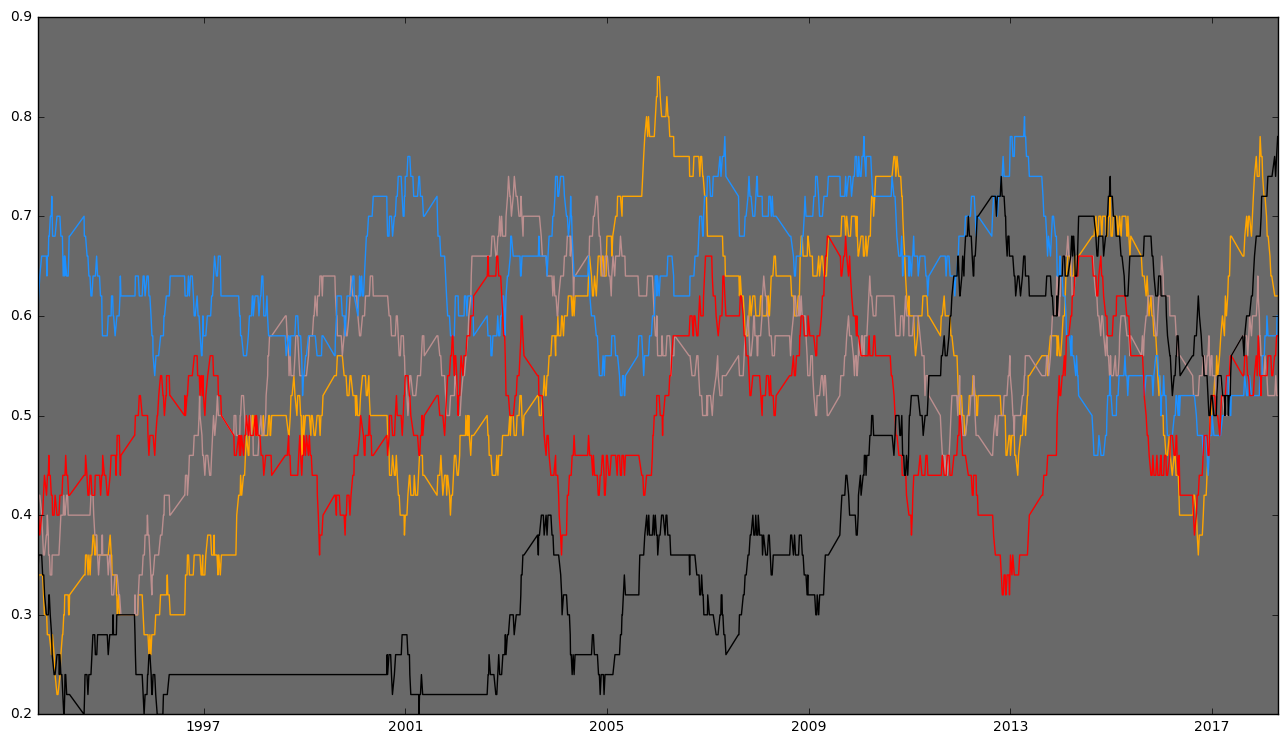

In [38]:
chelsea_metric = chelsea_raw.Vic.rolling(window=50).mean()
arsenal_metric = arsenal_raw.Vic.rolling(window=50).mean()
manu_metric = manchesterunited_raw.Vic.rolling(window=50).mean()
liv_metric = liverpool_raw.Vic.rolling(window=50).mean()
tot_metric = tottenham_raw.Vic.rolling(window=50).mean()
city_metric = manchestercity_raw.Vic.rolling(window=50).mean()



plt.plot(chelsea_raw.date, chelsea_metric, 'orange')
plt.plot(arsenal_raw.date, arsenal_metric, color='rosybrown')
plt.plot(manchesterunited_raw.date, manu_metric, 'dodgerblue')
plt.plot(liverpool_raw.date, liv_metric, 'r')
plt.plot(manchestercity_raw.date, city_metric, 'k')


#plt.ylim([0.38, 0.87])
#plt.ylabel('Win Percentage')
#plt.title('Chelsea FC Win Percentage(2000-2011)', dict(size=20))

#plt.axvline(start_4, c='k', ls='--')
#plt.axvline(end_4, c='k', ls='--')

# plt.text(start_4-datetime.timedelta(days=890), .4, "Before Mourinho", dict(size=18), 
#              color='black', family='bold')
# plt.text(start_4, .4, "               Mourinho", dict(size=18), 
#              color='black', family='bold')
# plt.text(end_4, .4, "                    After Mourinho", dict(size=18), 
#              color='black', family='bold')

# plt.legend(('Chelsea FC', 'Arsenal FC', 'Manchester United'), shadow=True, loc=(0.81, 0.85))
plt.show()

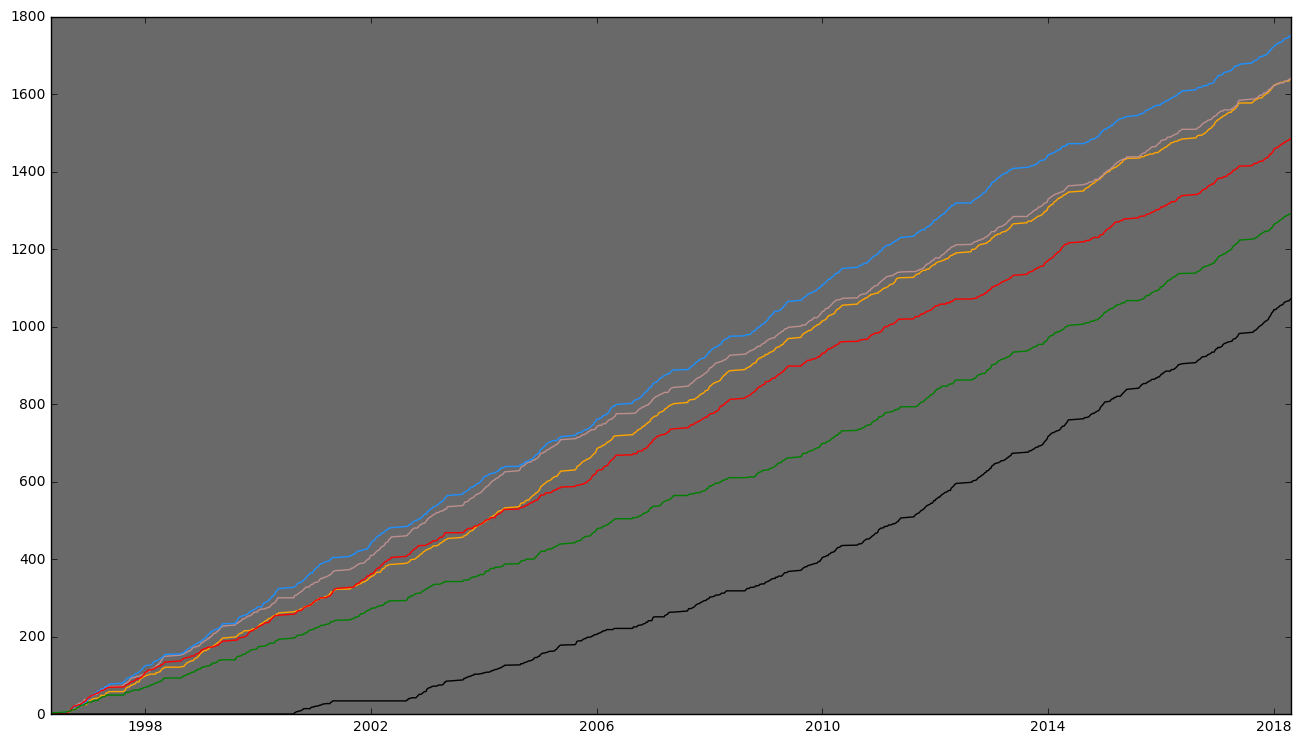

In [41]:
chelsea_metric = chelsea_raw.points.cumsum()
arsenal_metric = arsenal_raw.points.cumsum()
manu_metric = manchesterunited_raw.points.cumsum()
liv_metric = liverpool_raw.points.cumsum()
tot_metric = tottenham_raw.points.cumsum()
city_metric = manchestercity_raw.points.cumsum()



plt.plot(chelsea_raw.date, chelsea_metric, 'orange')
plt.plot(arsenal_raw.date, arsenal_metric, color='rosybrown')
plt.plot(manchesterunited_raw.date, manu_metric, 'dodgerblue')
plt.plot(liverpool_raw.date, liv_metric, 'r')
plt.plot(manchestercity_raw.date, city_metric, 'k')
plt.plot(tottenham_raw.date, tot_metric, 'green')



#plt.ylim([0.38, 0.87])
#plt.ylabel('Win Percentage')
#plt.title('Chelsea FC Win Percentage(2000-2011)', dict(size=20))

#plt.axvline(start_4, c='k', ls='--')
#plt.axvline(end_4, c='k', ls='--')

# plt.text(start_4-datetime.timedelta(days=890), .4, "Before Mourinho", dict(size=18), 
#              color='black', family='bold')
# plt.text(start_4, .4, "               Mourinho", dict(size=18), 
#              color='black', family='bold')
# plt.text(end_4, .4, "                    After Mourinho", dict(size=18), 
#              color='black', family='bold')

# plt.legend(('Chelsea FC', 'Arsenal FC', 'Manchester United'), shadow=True, loc=(0.81, 0.85))
plt.show()

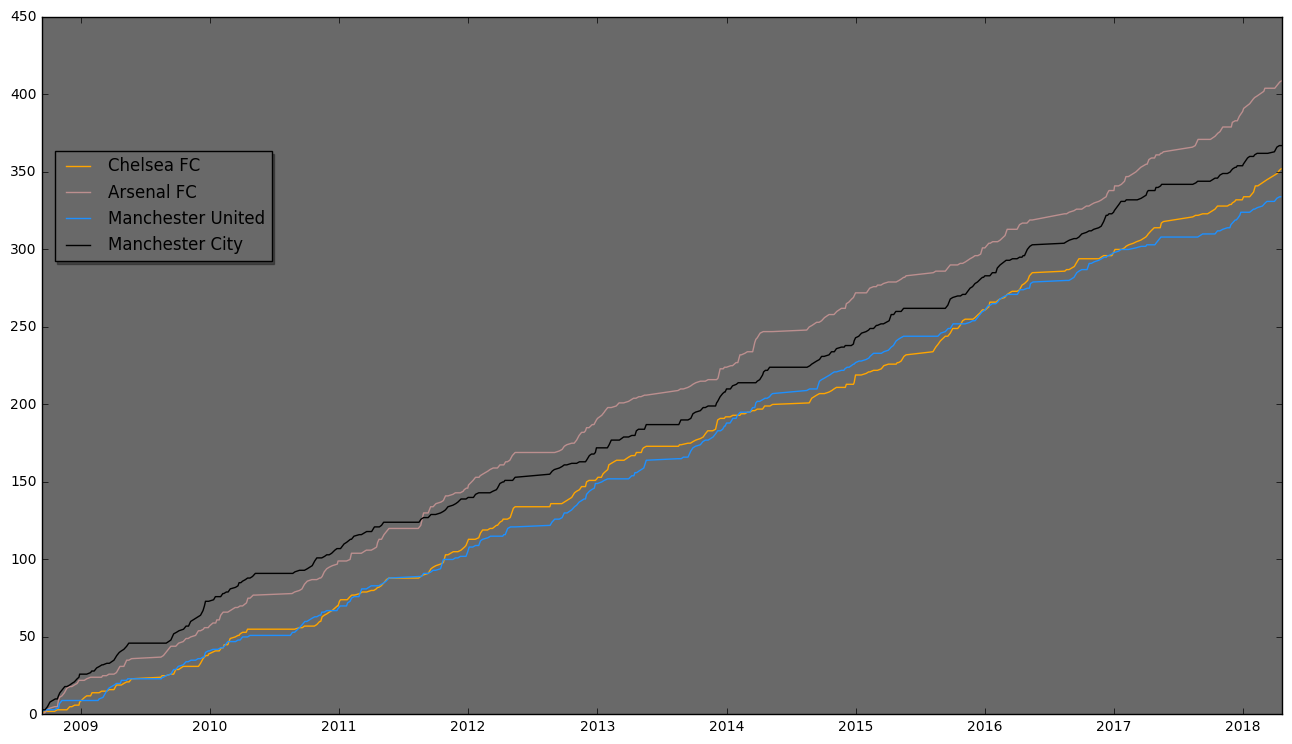

In [23]:
mask = (chelsea_raw.date >= start_4) 
chelsea_raw = chelsea_raw.loc[mask]
chelsea_raw = chelsea_raw.reset_index(drop=True)
mask = (manchestercity_raw.date >= start_4) 
manchestercity_raw = manchestercity_raw.loc[mask]
manchestercity_raw = manchestercity_raw.reset_index(drop=True)
mask = (manchesterunited_raw.date >= start_4) 
manchesterunited_raw = manchesterunited_raw.loc[mask]
manchesterunited_raw = manchesterunited_raw.reset_index(drop=True)
mask = (liverpool_raw.date >= start_4) 
liverpool_raw = liverpool_raw.loc[mask]
liverpool_raw = liverpool_raw.reset_index(drop=True)
mask = (arsenal_raw.date >= start_4) 
arsenal_raw = arsenal_raw.loc[mask]
arsenal_raw = arsenal_raw.reset_index(drop=True)
mask = (tottenham_raw.date >= start_4) 
tottenham_raw = tottenham_raw.loc[mask]
tottenham_raw = tottenham_raw.reset_index(drop=True)

chelsea_metric = chelsea_raw.GA.cumsum()
arsenal_metric = arsenal_raw.GA.cumsum()
manu_metric = manchesterunited_raw.GA.cumsum()
liv_metric = liverpool_raw.GA.cumsum()
tot_metric = tottenham_raw.GA.cumsum()
city_metric = manchestercity_raw.GA.cumsum()


# chelsea_metric = chelsea_raw.points.cumsum()
# arsenal_metric = arsenal_raw.points.cumsum()
# manu_metric = manchesterunited_raw.points.cumsum()
# liv_metric = liverpool_raw.points.cumsum()
# tot_metric = tottenham_raw.points.cumsum()
# city_metric = manchestercity_raw.points.cumsum()



plt.plot(chelsea_raw.date, chelsea_metric, 'orange')
plt.plot(arsenal_raw.date, arsenal_metric, color='rosybrown')
plt.plot(manchesterunited_raw.date, manu_metric, 'dodgerblue')
#plt.plot(liverpool_raw.date, liv_metric, 'r')
plt.plot(manchestercity_raw.date, city_metric, 'k')
#plt.plot(tottenham_raw.date, tot_metric, 'green')
plt.legend(('Chelsea FC', 'Arsenal FC', 'Manchester United', "Manchester City"), 
           shadow=True, loc=(0.01, 0.65))


#plt.ylim([0.38, 0.87])
#plt.ylabel('Win Percentage')
#plt.title('Chelsea FC Win Percentage(2000-2011)', dict(size=20))

#plt.axvline(start_4, c='k', ls='--')
#plt.axvline(end_4, c='k', ls='--')

# plt.text(start_4-datetime.timedelta(days=890), .4, "Before Mourinho", dict(size=18), 
#              color='black', family='bold')
# plt.text(start_4, .4, "               Mourinho", dict(size=18), 
#              color='black', family='bold')
# plt.text(end_4, .4, "                    After Mourinho", dict(size=18), 
#              color='black', family='bold')

plt.show()

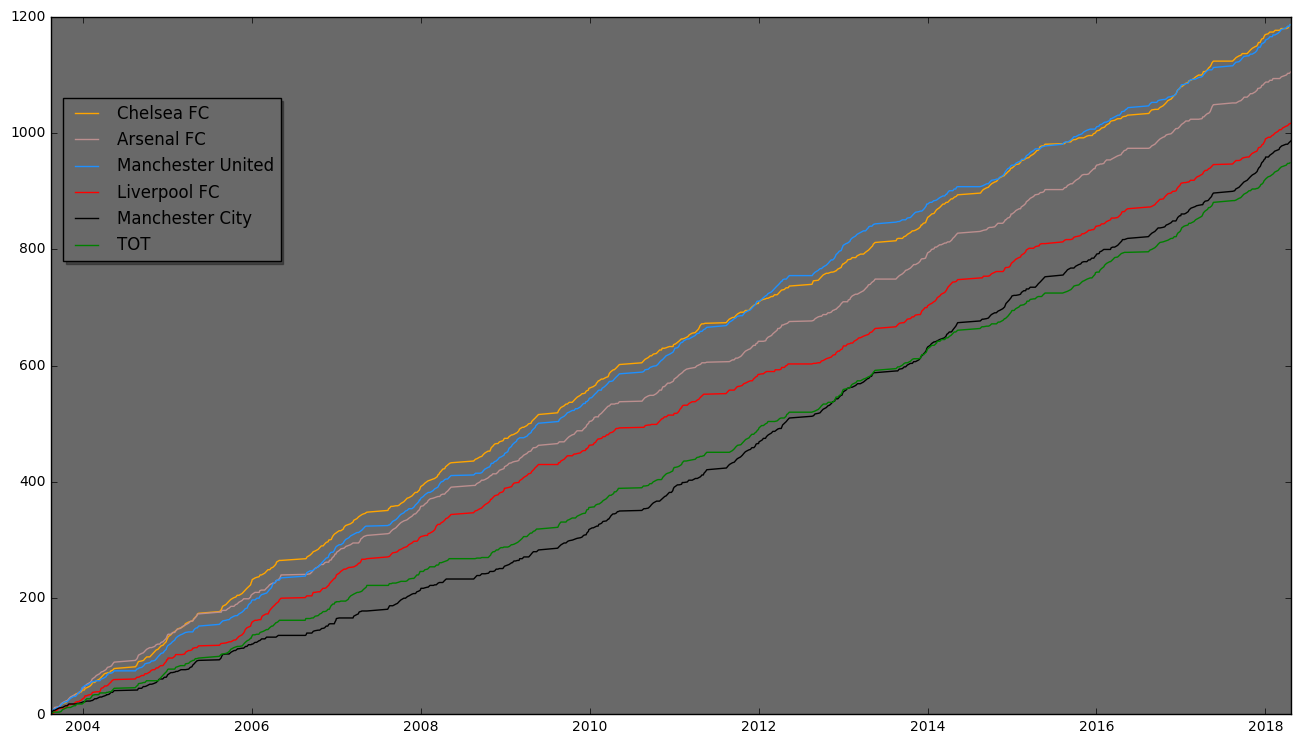

In [43]:
mask = (chelsea_raw.date >= start_2) 
chelsea_raw = chelsea_raw.loc[mask]
chelsea_raw = chelsea_raw.reset_index(drop=True)
mask = (manchestercity_raw.date >= start_2) 
manchestercity_raw = manchestercity_raw.loc[mask]
manchestercity_raw = manchestercity_raw.reset_index(drop=True)
mask = (manchesterunited_raw.date >= start_2) 
manchesterunited_raw = manchesterunited_raw.loc[mask]
manchesterunited_raw = manchesterunited_raw.reset_index(drop=True)
mask = (liverpool_raw.date >= start_2) 
liverpool_raw = liverpool_raw.loc[mask]
liverpool_raw = liverpool_raw.reset_index(drop=True)
mask = (arsenal_raw.date >= start_2) 
arsenal_raw = arsenal_raw.loc[mask]
arsenal_raw = arsenal_raw.reset_index(drop=True)
mask = (tottenham_raw.date >= start_2) 
tottenham_raw = tottenham_raw.loc[mask]
tottenham_raw = tottenham_raw.reset_index(drop=True)



chelsea_metric = chelsea_raw.points.cumsum()
arsenal_metric = arsenal_raw.points.cumsum()
manu_metric = manchesterunited_raw.points.cumsum()
liv_metric = liverpool_raw.points.cumsum()
tot_metric = tottenham_raw.points.cumsum()
city_metric = manchestercity_raw.points.cumsum()



plt.plot(chelsea_raw.date, chelsea_metric, 'orange')
plt.plot(arsenal_raw.date, arsenal_metric, color='rosybrown')
plt.plot(manchesterunited_raw.date, manu_metric, 'dodgerblue')
plt.plot(liverpool_raw.date, liv_metric, 'r')
plt.plot(manchestercity_raw.date, city_metric, 'k')
plt.plot(tottenham_raw.date, tot_metric, 'green')
plt.legend(('Chelsea FC', 'Arsenal FC', 'Manchester United', "Liverpool FC", "Manchester City", "TOT"), 
           shadow=True, loc=(0.01, 0.65))


#plt.ylim([0.38, 0.87])
#plt.ylabel('Win Percentage')
#plt.title('Chelsea FC Win Percentage(2000-2011)', dict(size=20))

#plt.axvline(start_4, c='k', ls='--')
#plt.axvline(end_4, c='k', ls='--')

# plt.text(start_4-datetime.timedelta(days=890), .4, "Before Mourinho", dict(size=18), 
#              color='black', family='bold')
# plt.text(start_4, .4, "               Mourinho", dict(size=18), 
#              color='black', family='bold')
# plt.text(end_4, .4, "                    After Mourinho", dict(size=18), 
#              color='black', family='bold')

plt.show()

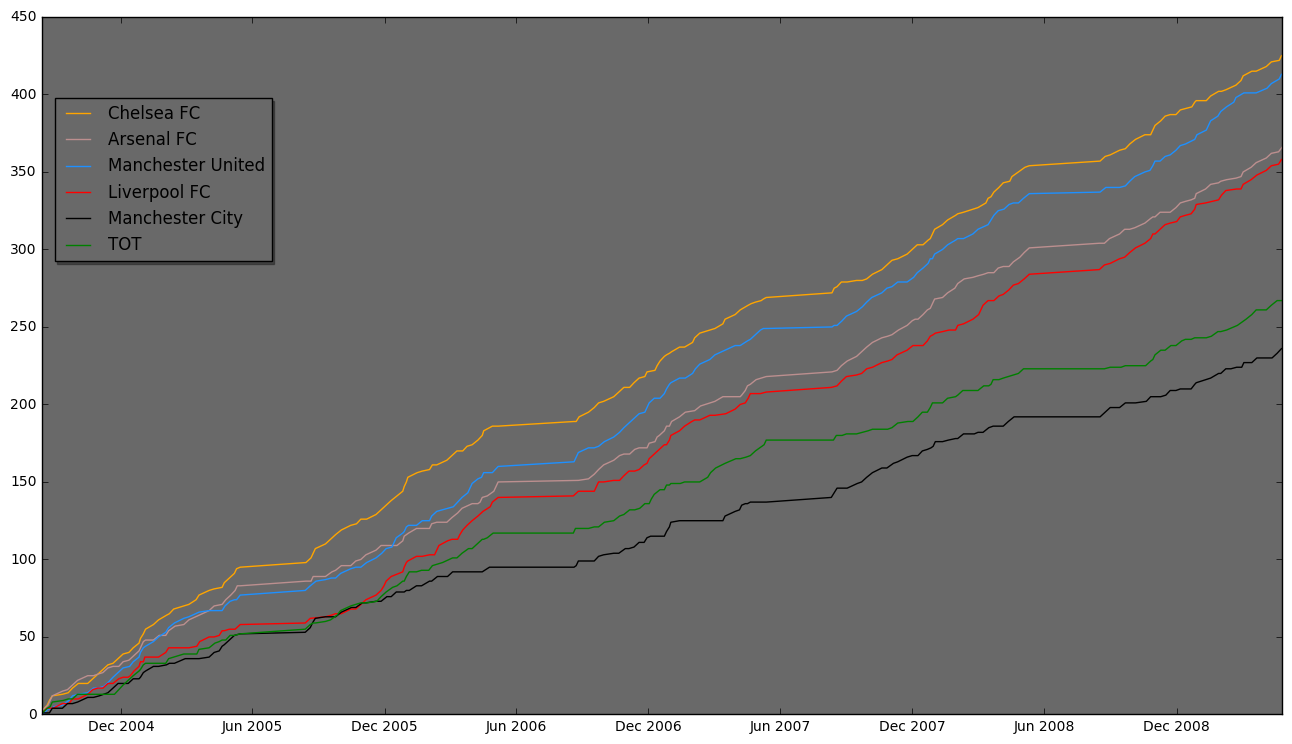

In [44]:
mask = (chelsea_raw.date >= start_3) & (chelsea_raw.date <= end_1)
chelsea_raw = chelsea_raw.loc[mask]
chelsea_raw = chelsea_raw.reset_index(drop=True)
mask = (manchestercity_raw.date >= start_3) & (manchestercity_raw.date <= end_1)
manchestercity_raw = manchestercity_raw.loc[mask]
manchestercity_raw = manchestercity_raw.reset_index(drop=True)
mask = (manchesterunited_raw.date >= start_3) & (manchesterunited_raw.date <= end_1)
manchesterunited_raw = manchesterunited_raw.loc[mask]
manchesterunited_raw = manchesterunited_raw.reset_index(drop=True)
mask = (liverpool_raw.date >= start_3) & (liverpool_raw.date <= end_1)
liverpool_raw = liverpool_raw.loc[mask]
liverpool_raw = liverpool_raw.reset_index(drop=True)
mask = (arsenal_raw.date >= start_3) & (arsenal_raw.date <= end_1)
arsenal_raw = arsenal_raw.loc[mask]
arsenal_raw = arsenal_raw.reset_index(drop=True)
mask = (tottenham_raw.date >= start_3) & (tottenham_raw.date <= end_1)
tottenham_raw = tottenham_raw.loc[mask]
tottenham_raw = tottenham_raw.reset_index(drop=True)



chelsea_metric = chelsea_raw.points.cumsum()
arsenal_metric = arsenal_raw.points.cumsum()
manu_metric = manchesterunited_raw.points.cumsum()
liv_metric = liverpool_raw.points.cumsum()
tot_metric = tottenham_raw.points.cumsum()
city_metric = manchestercity_raw.points.cumsum()



plt.plot(chelsea_raw.date, chelsea_metric, 'orange')
plt.plot(arsenal_raw.date, arsenal_metric, color='rosybrown')
plt.plot(manchesterunited_raw.date, manu_metric, 'dodgerblue')
plt.plot(liverpool_raw.date, liv_metric, 'r')
plt.plot(manchestercity_raw.date, city_metric, 'k')
plt.plot(tottenham_raw.date, tot_metric, 'green')
plt.legend(('Chelsea FC', 'Arsenal FC', 'Manchester United', "Liverpool FC", "Manchester City", "TOT"), 
           shadow=True, loc=(0.01, 0.65))


#plt.ylim([0.38, 0.87])
#plt.ylabel('Win Percentage')
#plt.title('Chelsea FC Win Percentage(2000-2011)', dict(size=20))

#plt.axvline(start_4, c='k', ls='--')
#plt.axvline(end_4, c='k', ls='--')

# plt.text(start_4-datetime.timedelta(days=890), .4, "Before Mourinho", dict(size=18), 
#              color='black', family='bold')
# plt.text(start_4, .4, "               Mourinho", dict(size=18), 
#              color='black', family='bold')
# plt.text(end_4, .4, "                    After Mourinho", dict(size=18), 
#              color='black', family='bold')

plt.show()

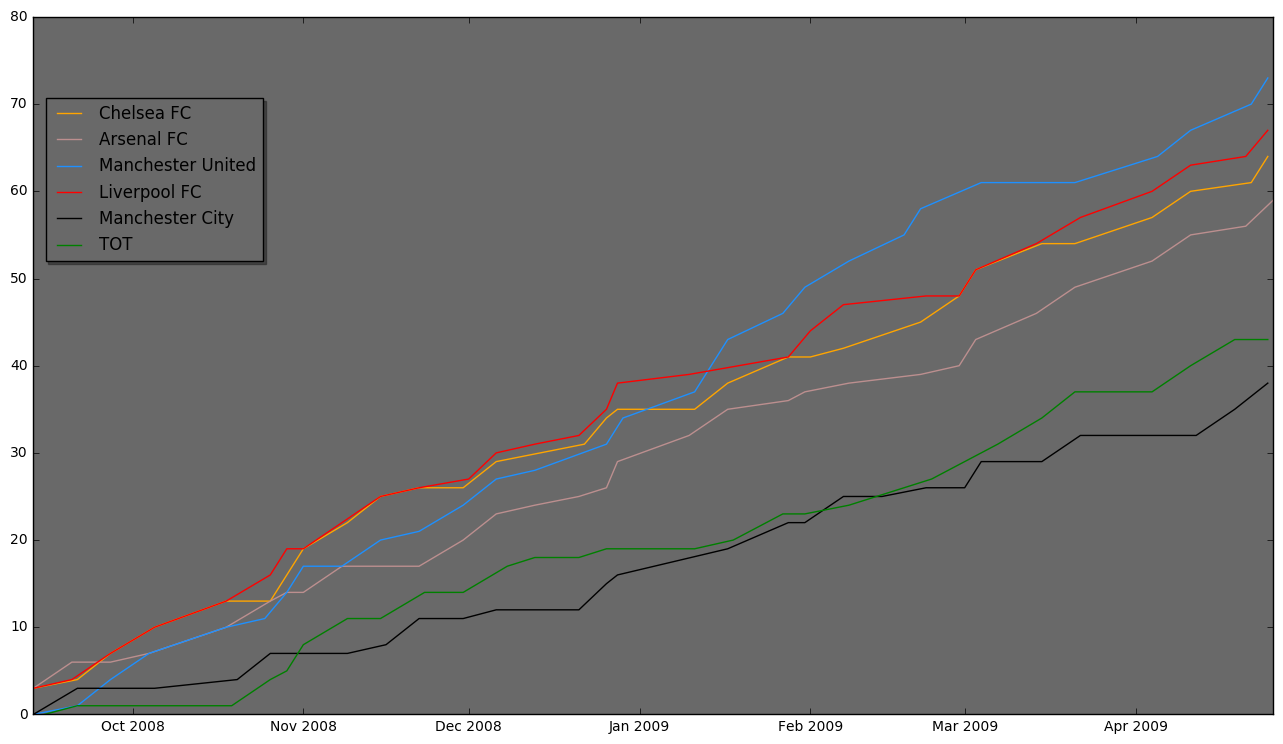

In [45]:
mask = (chelsea_raw.date >= start_4) 
chelsea_raw = chelsea_raw.loc[mask]
chelsea_raw = chelsea_raw.reset_index(drop=True)
mask = (manchestercity_raw.date >= start_4) 
manchestercity_raw = manchestercity_raw.loc[mask]
manchestercity_raw = manchestercity_raw.reset_index(drop=True)
mask = (manchesterunited_raw.date >= start_4) 
manchesterunited_raw = manchesterunited_raw.loc[mask]
manchesterunited_raw = manchesterunited_raw.reset_index(drop=True)
mask = (liverpool_raw.date >= start_4) 
liverpool_raw = liverpool_raw.loc[mask]
liverpool_raw = liverpool_raw.reset_index(drop=True)
mask = (arsenal_raw.date >= start_4) 
arsenal_raw = arsenal_raw.loc[mask]
arsenal_raw = arsenal_raw.reset_index(drop=True)
mask = (tottenham_raw.date >= start_4) 
tottenham_raw = tottenham_raw.loc[mask]
tottenham_raw = tottenham_raw.reset_index(drop=True)



chelsea_metric = chelsea_raw.points.cumsum()
arsenal_metric = arsenal_raw.points.cumsum()
manu_metric = manchesterunited_raw.points.cumsum()
liv_metric = liverpool_raw.points.cumsum()
tot_metric = tottenham_raw.points.cumsum()
city_metric = manchestercity_raw.points.cumsum()



plt.plot(chelsea_raw.date, chelsea_metric, 'orange')
plt.plot(arsenal_raw.date, arsenal_metric, color='rosybrown')
plt.plot(manchesterunited_raw.date, manu_metric, 'dodgerblue')
plt.plot(liverpool_raw.date, liv_metric, 'r')
plt.plot(manchestercity_raw.date, city_metric, 'k')
plt.plot(tottenham_raw.date, tot_metric, 'green')
plt.legend(('Chelsea FC', 'Arsenal FC', 'Manchester United', "Liverpool FC", "Manchester City", "TOT"), 
           shadow=True, loc=(0.01, 0.65))


#plt.ylim([0.38, 0.87])
#plt.ylabel('Win Percentage')
#plt.title('Chelsea FC Win Percentage(2000-2011)', dict(size=20))

#plt.axvline(start_4, c='k', ls='--')
#plt.axvline(end_4, c='k', ls='--')

# plt.text(start_4-datetime.timedelta(days=890), .4, "Before Mourinho", dict(size=18), 
#              color='black', family='bold')
# plt.text(start_4, .4, "               Mourinho", dict(size=18), 
#              color='black', family='bold')
# plt.text(end_4, .4, "                    After Mourinho", dict(size=18), 
#              color='black', family='bold')

plt.show()

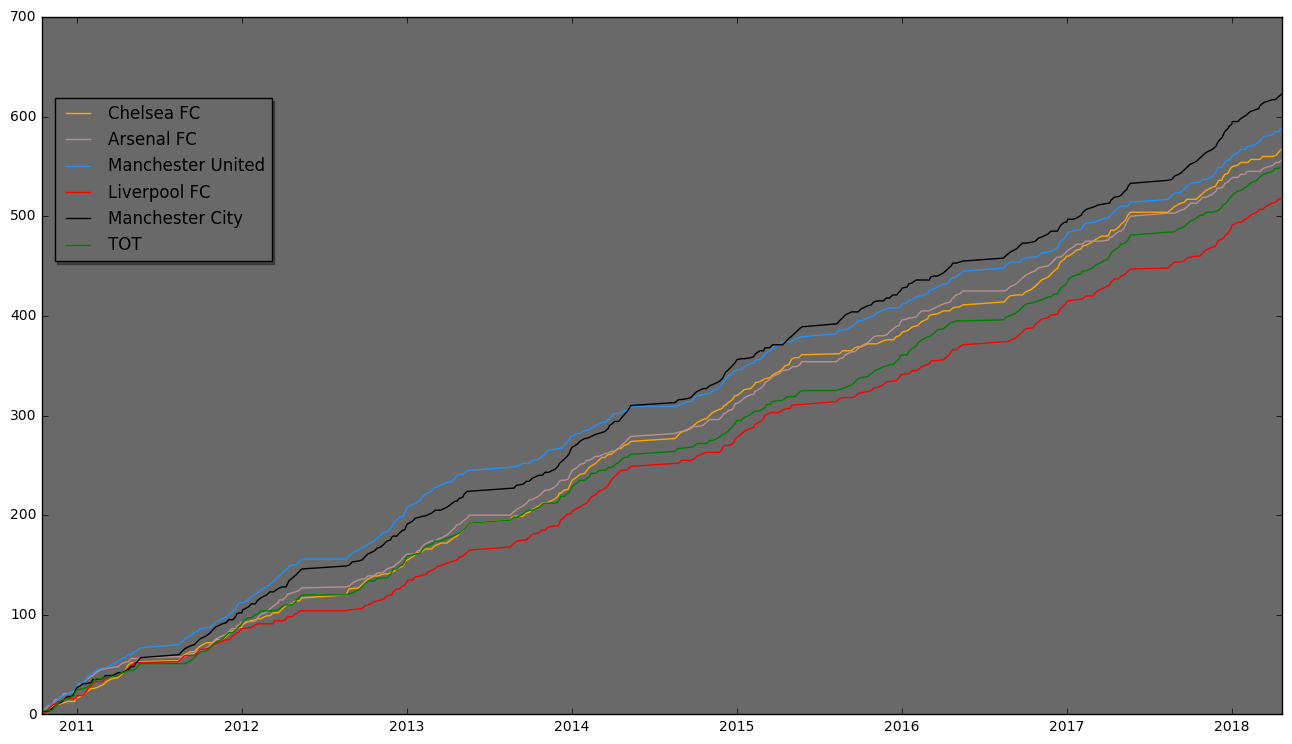

In [61]:
start_4 = pd.to_datetime('10/16/2010')
mask = (chelsea_raw.date >= start_4) 
chelsea_raw = chelsea_raw.loc[mask]
chelsea_raw = chelsea_raw.reset_index(drop=True)
mask = (manchestercity_raw.date >= start_4) 
manchestercity_raw = manchestercity_raw.loc[mask]
manchestercity_raw = manchestercity_raw.reset_index(drop=True)
mask = (manchesterunited_raw.date >= start_4) 
manchesterunited_raw = manchesterunited_raw.loc[mask]
manchesterunited_raw = manchesterunited_raw.reset_index(drop=True)
mask = (liverpool_raw.date >= start_4) 
liverpool_raw = liverpool_raw.loc[mask]
liverpool_raw = liverpool_raw.reset_index(drop=True)
mask = (arsenal_raw.date >= start_4) 
arsenal_raw = arsenal_raw.loc[mask]
arsenal_raw = arsenal_raw.reset_index(drop=True)
mask = (tottenham_raw.date >= start_4) 
tottenham_raw = tottenham_raw.loc[mask]
tottenham_raw = tottenham_raw.reset_index(drop=True)



chelsea_metric = chelsea_raw.points.cumsum()
arsenal_metric = arsenal_raw.points.cumsum()
manu_metric = manchesterunited_raw.points.cumsum()
liv_metric = liverpool_raw.points.cumsum()
tot_metric = tottenham_raw.points.cumsum()
city_metric = manchestercity_raw.points.cumsum()



plt.plot(chelsea_raw.date, chelsea_metric, 'orange')
plt.plot(arsenal_raw.date, arsenal_metric, color='rosybrown')
plt.plot(manchesterunited_raw.date, manu_metric, 'dodgerblue')
plt.plot(liverpool_raw.date, liv_metric, 'r')
plt.plot(manchestercity_raw.date, city_metric, 'k')
plt.plot(tottenham_raw.date, tot_metric, 'green')
plt.legend(('Chelsea FC', 'Arsenal FC', 'Manchester United', "Liverpool FC", "Manchester City", "TOT"), 
           shadow=True, loc=(0.01, 0.65))


#plt.ylim([0.38, 0.87])
#plt.ylabel('Win Percentage')
#plt.title('Chelsea FC Win Percentage(2000-2011)', dict(size=20))

#plt.axvline(start_4, c='k', ls='--')
#plt.axvline(end_4, c='k', ls='--')

# plt.text(start_4-datetime.timedelta(days=890), .4, "Before Mourinho", dict(size=18), 
#              color='black', family='bold')
# plt.text(start_4, .4, "               Mourinho", dict(size=18), 
#              color='black', family='bold')
# plt.text(end_4, .4, "                    After Mourinho", dict(size=18), 
#              color='black', family='bold')

plt.show()

In [48]:
chelsea_metric

Series([], Name: points, dtype: float64)